# netflix-data-analysis

Use the "Run" button to execute the code.

# Introduction

I will analyze data about Netflix Movies and TV Shows which I collected from https://www.kaggle.com/shivamb/netflix-shows . This dataset has information about Movies and TV shows age rating, releasing year, duration, producing country, Director also when its added in Netflix.There are several ways to include a dataset in Jupyter notebook. Like-

    1.Download the CSV manually and upload it via Jupyter's GUI.
    2.Use the urlretrieve function from the urllib.request to download CSV files from a raw URL.
    3.Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper     
    function for direct download.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="netflix-data-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mahbubulhoqueshourov/netflix-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mahbubulhoqueshourov/netflix-data-analysis


'https://jovian.ai/mahbubulhoqueshourov/netflix-data-analysis'

In [4]:
!pip install jovian opendatasets --upgrade --quiet #opendatasets is not a built in package in python,therefore it has to be included.

In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Including the dataset into Jupyter Notebook

In [6]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mahbubshourov
Your Kaggle Key: ········


100%|██████████| 1.18M/1.18M [00:00<00:00, 60.4MB/s]

In [7]:
os.listdir('./netflix-shows')

['netflix_titles.csv']

In [8]:
netflix_df = pd.read_csv('./netflix-shows/netflix_titles.csv')

In [9]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


# Save and Upload Notebook

In [10]:
# Select a project name
project='netflix-data-analysis'
# Install the Jovian library
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project=project)


<IPython.core.display.Javascript object>

[jovian] Updating notebook "mahbubulhoqueshourov/netflix-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mahbubulhoqueshourov/netflix-data-analysis


'https://jovian.ai/mahbubulhoqueshourov/netflix-data-analysis'

# Data Preparation and Cleaning

In [11]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Here I can see that the column named **'description'** is not suitable to analyze cause this column has a short description about that particular Movie or TV Show. So, I don't think its important for analysis and visualization. Also a column named **'listed_in'** in this column it has genre of that particular content. Working with this column is so hard for me as a beginner thats why for this time I am skipping this column. Then, I will perform this visualization using other columns.

In [12]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [13]:
netflix = netflix_df[['show_id','type','title','director','cast','country','date_added','release_year','rating','duration']]

From info of this dataset I find out that three column **'country', 'director' and 'cast'** have some **NaN** values. For null values my analysis and visualization will face a lot of problem. I replacing **'director' and 'cast'** NaN values with **'No Data'** and 'country' column NaN values with a default data

In [14]:
# Replacments
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])

netflix['cast'].replace(np.nan, 'No Data',inplace  = True)
netflix['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

netflix.dropna(inplace=True)

# Drop Duplicates

netflix.drop_duplicates(inplace=True)

**'date_added'** column has a date but its not defined as date so I converting it to datetime data for my visualization.

In [15]:
netflix['date_added']=pd.to_datetime(netflix['date_added'])

netflix['month_added']=netflix['date_added'].dt.month
netflix['month_name_added']=netflix['date_added'].dt.month_name()
netflix['year_added']=netflix['date_added'].dt.year

In [16]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,month_added,month_name_added,year_added
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,12,December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,11,November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,1,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,10,October,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,3,March,2019
7784,s7785,Movie,Zulu Man in Japan,No Data,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,9,September,2020
7785,s7786,TV Show,Zumbo's Just Desserts,No Data,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,10,October,2020


In [17]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           7770 non-null   object        
 1   type              7770 non-null   object        
 2   title             7770 non-null   object        
 3   director          7770 non-null   object        
 4   cast              7770 non-null   object        
 5   country           7770 non-null   object        
 6   date_added        7770 non-null   datetime64[ns]
 7   release_year      7770 non-null   int64         
 8   rating            7770 non-null   object        
 9   duration          7770 non-null   object        
 10  month_added       7770 non-null   int64         
 11  month_name_added  7770 non-null   object        
 12  year_added        7770 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 849.8+ KB


Above we can see that dataframe don't have any null values and they are usable for visualization. But There are some difference between Movie data and TV Shows data. So, for my further use I making individual dataframe for Movies and TV Shows.

In [18]:
netflix_movie = netflix[netflix['type'] == 'Movie']
netflix_movie = netflix_movie[netflix_movie['year_added'] < 2021]
netflix_show = netflix[netflix['type'] == 'TV Show']
netflix_show = netflix_show[netflix_show['year_added'] < 2021]

In [19]:
netflix_movie_usa = netflix_movie[netflix_movie['country']=='United States']
netflix_show_usa = netflix_show[netflix_show['country']=='United States']

In [20]:
netflix_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,month_added,month_name_added,year_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,12,December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,11,November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,1,January,2020
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,6,June,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,1,January,2020
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,10,October,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,3,March,2019
7784,s7785,Movie,Zulu Man in Japan,No Data,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,9,September,2020


In [21]:
netflix_movie['duration']

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5284, dtype: object

In [22]:
netflix_show['duration']

0       4 Seasons
5        1 Season
11       1 Season
12       1 Season
16       1 Season
          ...    
7767     1 Season
7775     1 Season
7777    2 Seasons
7779     1 Season
7785     1 Season
Name: duration, Length: 2369, dtype: object

We can see that Movie has duration as minute and TV Show duration as season. We must use this data as integer but here these are not integer. With the below operations and functions I changed them into integer for easy using.

In [23]:
netflix_movie['duration']=netflix_movie['duration'].str.replace(' min','')
netflix_movie['duration']=pd.to_numeric(netflix_movie['duration'], errors='coerce')

In [24]:
def change(x):
    return x[0]

In [25]:
netflix_show['duration']=netflix_show['duration'].apply(change)
netflix_show['duration']=pd.to_numeric(netflix_show['duration'], errors='coerce')

In [26]:
netflix_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,month_added,month_name_added,year_added
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,8,August,2020
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1,7,July,2017
11,s12,TV Show,1983,No Data,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1,11,November,2018
12,s13,TV Show,1994,Diego Enrique Osorno,No Data,Mexico,2019-05-17,2019,TV-MA,1,5,May,2019
16,s17,TV Show,Feb-09,No Data,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,2019-03-20,2018,TV-14,1,3,March,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,No Data,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1,12,December,2016
7775,s7776,TV Show,Zoids Wild,No Data,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,2018,TV-Y7,1,8,August,2020
7777,s7778,TV Show,Zombie Dumb,No Data,No Data,United States,2019-07-01,2018,TV-Y7,2,7,July,2019
7779,s7780,TV Show,Zona Rosa,No Data,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,2019,TV-MA,1,11,November,2019


# Exploratory Data Analysis(EDA)

Lets see Which type of contents are mostly available in **Netflix.**

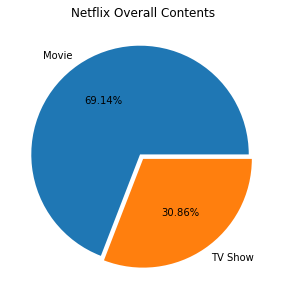

In [27]:
plt.figure(figsize=(20,5))
plt.title("Netflix Overall Contents")
plt.pie(netflix['type'].value_counts(),labels=netflix['type'].value_counts().index,
        explode=[0.05,0],autopct='%1.2f%%')
plt.show()

Above pie chart shows us that **69%** contents are Movies and the rest of them is TV Shows

Lets see by the age rating of Movies and TV Shows who are mostly suitable target audience.

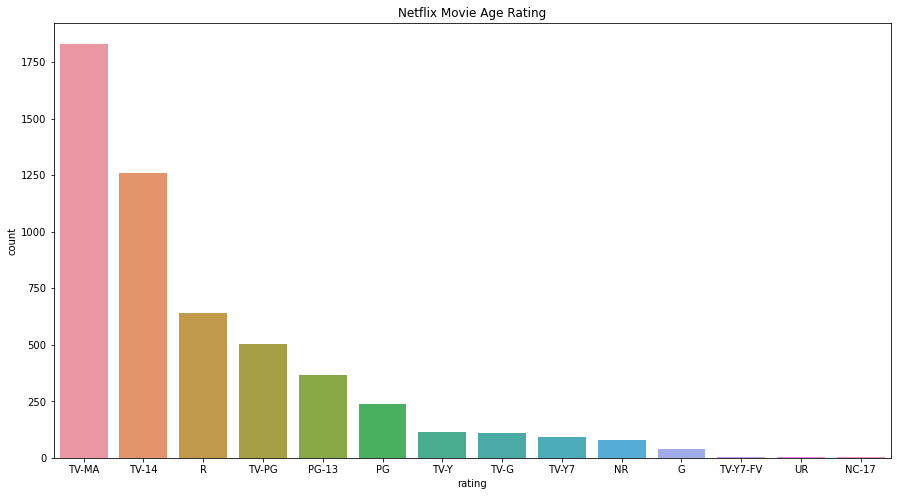

In [28]:
plt.figure(figsize=(15,8))
plt.title("Netflix Movie Age Rating")
sns.countplot(x='rating', data=netflix_movie, order=netflix_movie['rating'].value_counts().index);

Movies are mostly **TV-MA** rated that means these are suitable for over 17 years old person. There are also a lot of **TV-14** rated movies these are suitable for above 14 years old child. Also there are R rated movies those has sexuality.

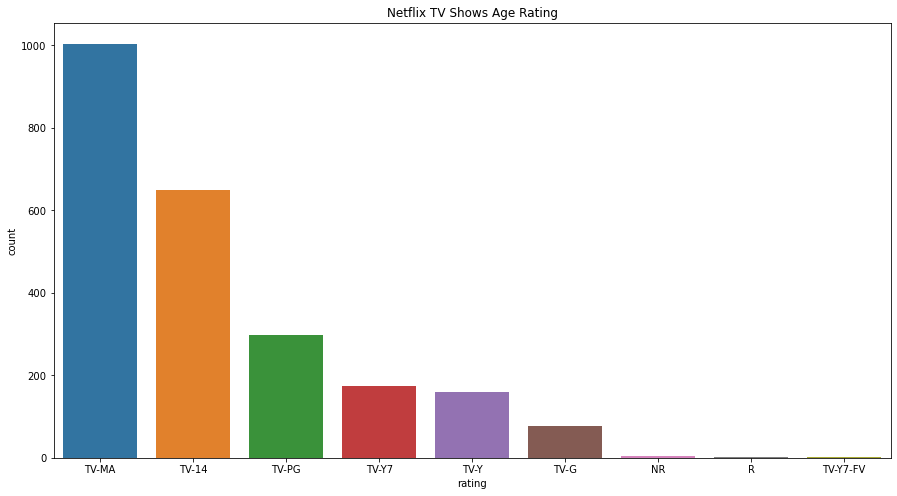

In [29]:
plt.figure(figsize=(15,8))
plt.title("Netflix TV Shows Age Rating")
sns.countplot(x='rating', data=netflix_show, order=netflix_show['rating'].value_counts().index);

Here its better in my thinking that TV Shows has less **adult content** than Movies. Most TV shows also suitable for above **17 years** old people. Also A lot of **TV Shows** in **Netflix** are suitable entertainment content for child. 

From the above two charts we can have an idea that most of the contents are for adults even though those are not sexual. Also a huge amount of contents for young child. I think **Netflix** TV Shows has more family contents than Movies.

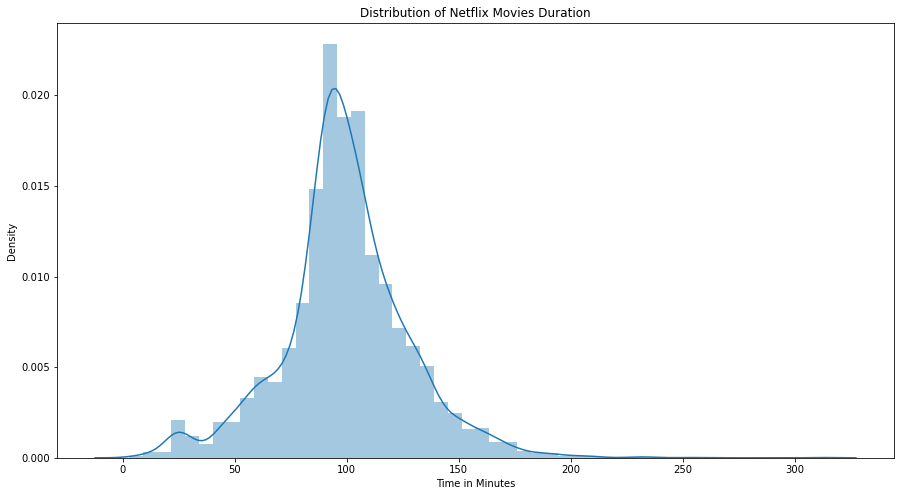

In [30]:
plt.figure(figsize=(15,8))
sns.distplot(netflix_movie['duration'])
plt.title('Distribution of Netflix Movies Duration')
plt.xlabel('Time in Minutes')
plt.show()

**Netflix** Movies average time duration is around 100 minutes. Here you can get to know further https://stephenfollows.com/netflix-original-movies-shows/

Lets see how movies popularity is going on in last few years.

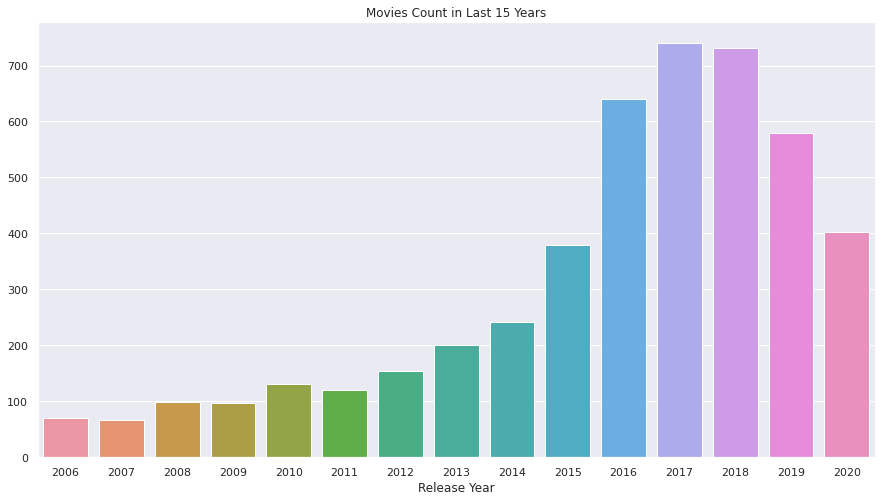

In [31]:
movie_last15 = netflix_movie[netflix_movie['release_year'] > 2005]
movie_last15 = movie_last15[movie_last15['release_year'] < 2021]
movie_count = movie_last15['release_year'].value_counts()
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
plt.title('Movies Count in Last 15 Years')
plt.xlabel('Release Year')
sns.barplot(x=movie_count.index, y=movie_count.values);

Here we can see that releasing of movies was increasing before 2017. And it was increasing highly after 2014. But somehow movie releasing decreased after 2017 and it is happening very alarming rate.

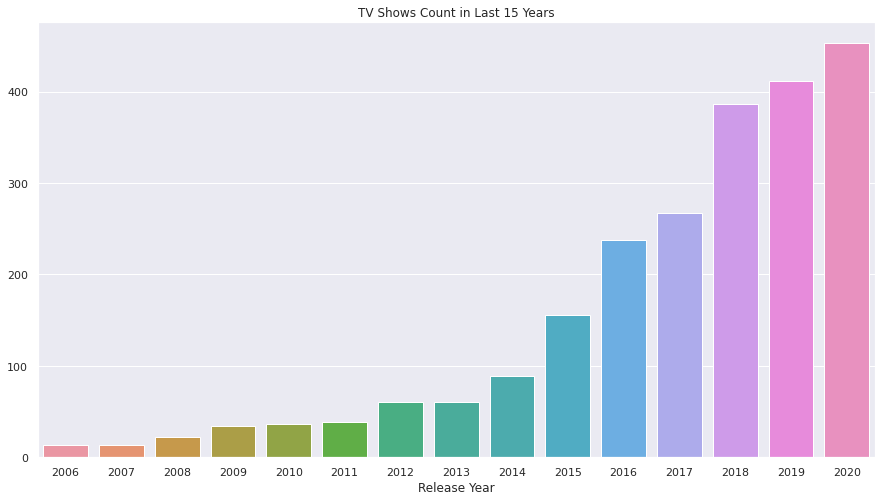

In [32]:
show_last15 = netflix_show[netflix_show['release_year'] > 2005]
show_last15 = show_last15[show_last15['release_year'] < 2021]
show_count = show_last15['release_year'].value_counts()
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
plt.xlabel('Release Year')
plt.title('TV Shows Count in Last 15 Years')
sns.barplot(x=show_count.index, y=show_count.values);

When we can see that popularity of movies is decreasing here TV shows are releasing in very high amount. So I think **Netflix**  prefers more on TV Shows these days than Movies. 

Now we wanna see when **Netflix** got attention of mass audience.

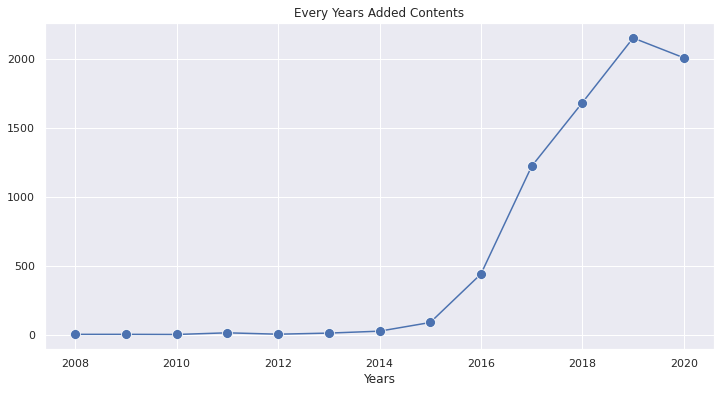

In [33]:
content_added = netflix['year_added'].value_counts().sort_index(ascending=False)
content_added = content_added[content_added.index < 2021]
plt.figure(figsize=(12,6))
sns.lineplot(data=content_added, marker='o', ms=10)
plt.xlabel('Years')
plt.ylabel('')
plt.title('Every Years Added Contents')
plt.show()

From the plot above we can see that **Netflix** started journey at 2008 but we know that **Netflix** started their streaming contents at 2007. But maybe those data somehow missed in this dataset. **Here you can see https://www.britannica.com/topic/Netflix-Inc**. From this dataset we can see **Netflix** streaming contents amount was so low from 2008 to 2014. After that **Netflix** got the attention of audience. Now we all know **Netflix** is one of the most popular streaming app. 

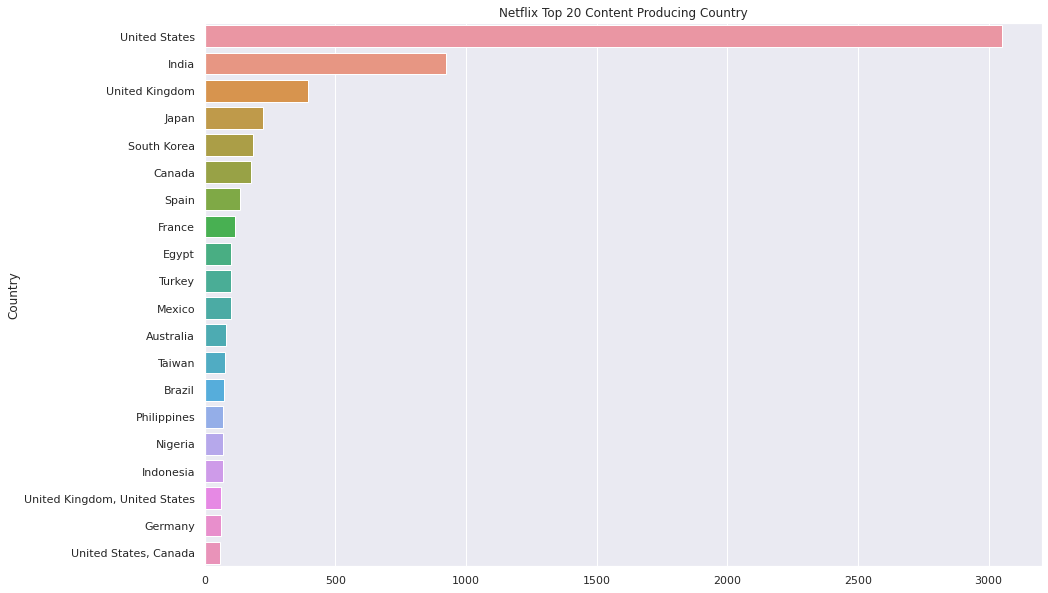

In [34]:
plt.figure(figsize=(15,10))
country_content = netflix["country"].value_counts().head(20)
plt.ylabel('Country')
sns.barplot(y=country_content.index, x=country_content.values);
plt.title("Netflix Top 20 Content Producing Country");

Above we can see that Top 20 content providing country on **Netflix**. **USA** ans **India** providing most of the contents in **Netflix.** You can know better from here https://www.statista.com/statistics/499844/netflix-markets-penetration/

# American Movies and TV shows

In [35]:
movie_usa_old = netflix_movie_usa["release_year"].value_counts().sort_index(ascending=False).head(11)
movie_usa = movie_usa_old[movie_usa_old.index!=2021]
movie_usa

show_usa_old = netflix_show_usa["release_year"].value_counts().sort_index(ascending=False).head(11)
show_usa = show_usa_old[show_usa_old.index!=2021]

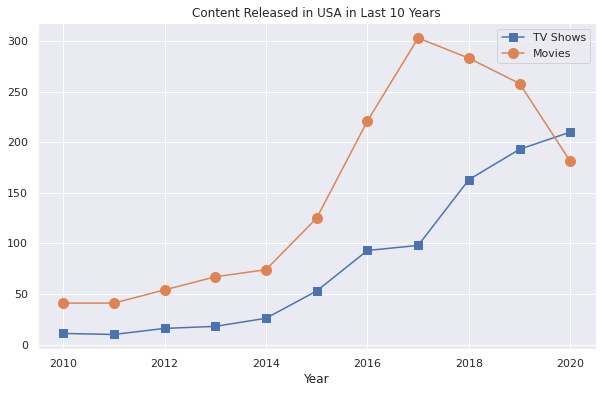

In [36]:
plt.figure(figsize=(10,6))
show_usa.plot.line(marker='s', ms=8);
movie_usa.plot.line(marker='o', ms=10);
plt.xlabel('Year')

plt.title("Content Released in USA in Last 10 Years")
plt.legend(['TV Shows', 'Movies']);

From this graph we can have an idea about which type of contents mostly popular today in **Netflix.** After 2017 popularity of Movies decreased and TV Shows got more popular. And Now in **USA** TV Shows got more popular among people.

# Indian Movies and TV Shows 

In [37]:
netflix_india = netflix[netflix['country'] == 'India']
netflix_india = netflix_india[netflix_india['release_year']>2010]
netflix_india = netflix_india[netflix_india['release_year']<2021]

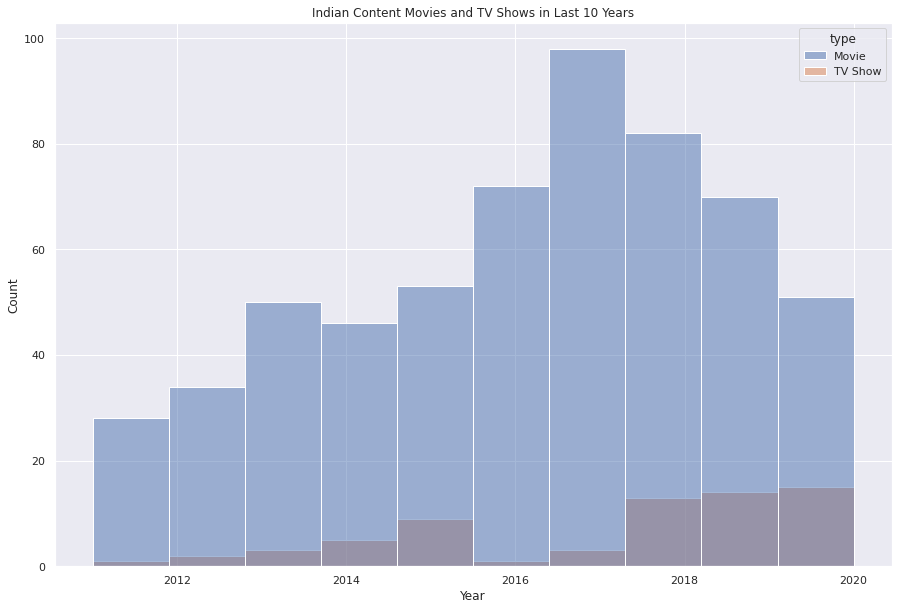

In [38]:
plt.figure(figsize=(15,10))
#sns.histplot(data=movie_india, x='release_year',alpha=0.4, bins=10);
#sns.histplot(data=show_india, x='release_year',alpha=0.4, bins=10);
sns.histplot(data=netflix_india, x='release_year', hue='type', bins=10);
plt.xlabel('Year')
plt.title("Indian Content Movies and TV Shows in Last 10 Years");

We saw above that **USA** in producing more **TV Shows** than **Movies**. But in **India** movies are far more popular than TV shows although TV shows amount is increasing last few years.

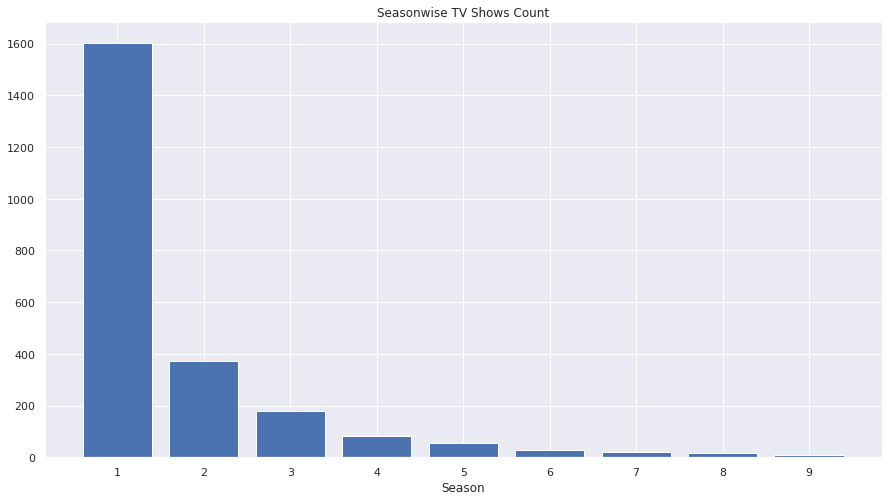

In [39]:
count_season = netflix_show['duration'].value_counts()
plt.figure(figsize=(15,8))
plt.bar(count_season.index, count_season.values);
plt.xticks(count_season.index);
plt.title('Seasonwise TV Shows Count')
plt.xlabel("Season");

This shows us that most of the TV shows has only 1 or 2 season. That means those TV Shows failed to get enough attention from audience. Only very few TV Shows has more than 5 season. I those are successfully got audience attention.

# **Asking & Answering Questions**

 ### Q1.  Which Country provides most contents to Netflix? 

For answering this we need to find individually which country provides maximum number of contents. Lets see

In [40]:
netflix["country"].value_counts().head(5)

United States     3051
India              923
United Kingdom     396
Japan              224
South Korea        183
Name: country, dtype: int64

Here we can see that **USA** provides maximum number of contents. Lets find out percentage about total contents.

In [41]:
count_usa = 0
total=0
for x in netflix["country"]:
    if x=='United States':
        count_usa += 1
    total += 1
percentage = count_usa/total*100
print("USA provides", "{:.2f}".format(percentage),"% of total contents.")

USA provides 39.27 % of total contents.


   ### Q2. When Netflix get popularity in whole world? 

To get this answer I think we should see when they started streaming mass contents. Lets see the graph

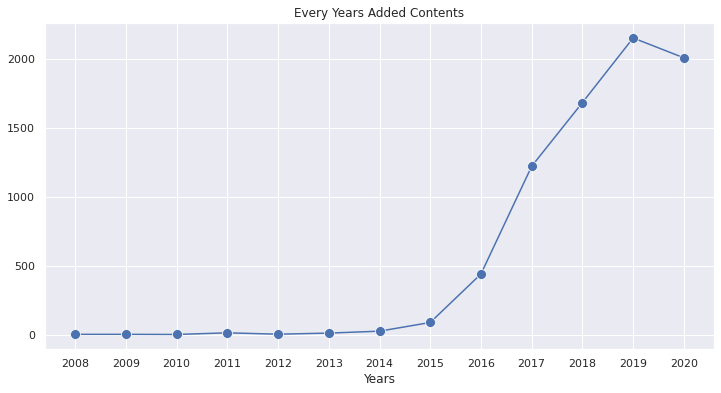

In [42]:
content_added = netflix['year_added'].value_counts().sort_index(ascending=False)
content_added = content_added[content_added.index < 2021]
plt.figure(figsize=(12,6))
sns.lineplot(data=content_added, marker='o', ms=10)
plt.xlabel('Years')
plt.xticks(content_added.index);
plt.title('Every Years Added Contents')
plt.ylabel('')
plt.show()

So, from this graph we can see that **Netflix** started adding high amount of contents after **2014**. So, on my data I can say that **Netflix** get popularity **before 2014**. So, after that popularity they started adding more and more contents to not lose their audience and also attract more audience to buy their subscription using current popularity and contents. You can more details here https://producthabits.com/how-netflix-became-a-100-billion-company-in-20-years/

### Q3.   Who are the TA(target audience) of Netflix?

For this, I think we should see the top 5 age rating of **Netflix** contents. Lets see

In [43]:
netflix['rating'].value_counts().head(5)

TV-MA    2861
TV-14    1928
TV-PG     804
R         665
PG-13     386
Name: rating, dtype: int64

Here we can see that most contents are **TV-MA** rated. It means those are suitable for young who are over 18 that means for adult. From this data three rating **TV-MA, TV-PG, R** these are only for adults and **TV-14, PG-13** rating means those are suitable for children over 14 years old. So, after all I think **TA(target audience)** of **Netflix** are college students or those who are **18-25** years old. For further long discussion you can see https://www.business2community.com/marketing/look-new-target-audience-netflix-subscribers-01813457. 

### Q4.  Is it a good idea to buy Netflix Subscription for Short film?

Short film is those Movie which has duration less than 40 minutes. In other defination short film also be consider when time duration is less than 50. Firstly see what we can get from mean.

In [44]:
netflix_movie['duration'].mean()

99.20249810749432

From this result is not satisfactory at all. Now lets see the percentage of short films from all Movies.

In [45]:
short_film = 0
for x in netflix_movie['duration']:
    if x <= 50:
        short_film+=1
total = 0
for x in netflix_movie['duration']:
    total+=1
percentage_of_short_flim = short_film/total*100
percentage_of_short_flim 

4.825889477668433

Here we can see that only around 5% of Movies are short film.So, I think its not a good idea to buy **Netflix** subscription only for short film.

### Q5.  What are the most popular TV Shows in Netflix?

In general idea the TV shows which has most number of seasons those are most popular. From above graph we see that TV shows has maximum 9 seasons. Now see which TV Shows has 9 seasons.

In [46]:
popular_tv_show = netflix_show[netflix_show['duration'] == 9]
print(popular_tv_show['title'])

468        American Horror Story
1181            Call the Midwife
1431    Club Friday The Series 6
2237              Forensic Files
4404                      Naruto
5818                  Still Game
6718           The Office (U.S.)
6983            The Walking Dead
Name: title, dtype: object


Above we can see the most popular TV Shows in **Netflix.**

### Q6.  Today in USA which is more popular TV Shows or Movies?

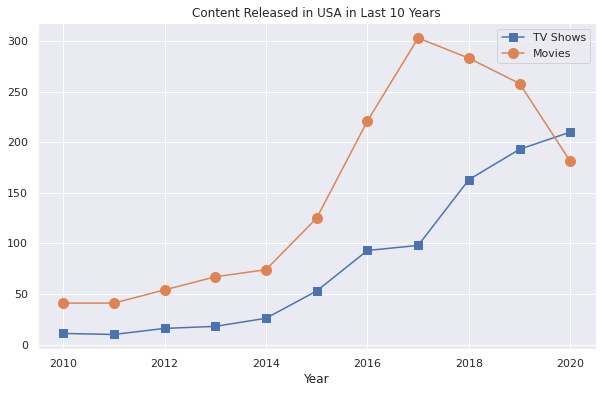

In [47]:
plt.figure(figsize=(10,6))
show_usa.plot.line(marker='s', ms=8);
movie_usa.plot.line(marker='o', ms=10);
plt.xlabel('Year')

plt.title("Content Released in USA in Last 10 Years")
plt.legend(['TV Shows', 'Movies']);

From graph We can see that Movies was popular all the last years accept 2020. Here we can see that popularity of Movies decreasing gradually after 2017. And from this dataset I can give my decision that in current situation TV Shows are more popular than Movies among Americans. 
Here you can get details discussion- 
- https://www.resticmagazine.com/reasons-why-tv-shows-have-become-better-than-movies/
- https://screenrant.com/tv-better-than-movies-reasons-why/
- https://www.quora.com/Are-TV-shows-becoming-more-popular-and-time-worthy-than-movies

# Interferences and Conclusions

From the analysis above we have drawn many interferences and learnt many concepts. Below is a summary of them-

- The most TV shows and Movies of Netflix produced by USA. It was known that Hollywood of USA provides almost half of all contents over the world.
- American Horror Story, Call the Midwife, Club Friday The Series 6, Forensic Files etc are the most popular TV Shows known to a lot because of using much Netflix.
- Visualizing this dataset is so interesting because I got an unexpected thing that in USA TV Shows getting more attraction than Movies. This may change the criteria of a lot of contents.  
- A thing that disappoints me so much that Netflix has literally a little amount of family contents. So, parents have to keep their young children away from Netflix. Otherwise it will make them hungry of adultry.
- Netflix has really little number of short film and a huge number of featured Movie which has duration around 100 minutes.

In [48]:
jovian.commit(project="netflix-data-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mahbubulhoqueshourov/netflix-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/mahbubulhoqueshourov/netflix-data-analysis


'https://jovian.ai/mahbubulhoqueshourov/netflix-data-analysis'